In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("datasets/ecg_data.txt", sep="\t")
data = np.array(data)
data

array([[200.004,   4.82 ,   2.135],
       [200.008,   4.805,   2.19 ],
       [200.012,   4.75 ,   2.285],
       ...,
       [379.988,   4.88 ,   5.085],
       [379.992,   4.87 ,   5.085],
       [379.996,   4.89 ,   5.115]])

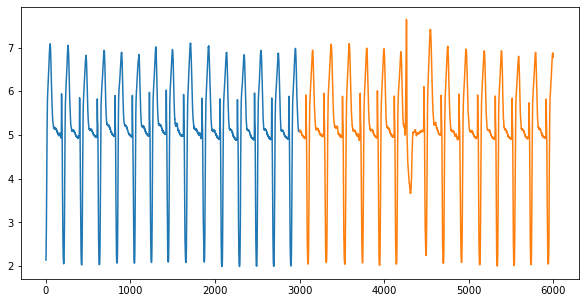

In [2]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(3000), data[:3000, 2])
plt.plot(np.arange(3000, 6000), data[3000:6000, 2])

In [3]:
from scipy.spatial.distance import cdist

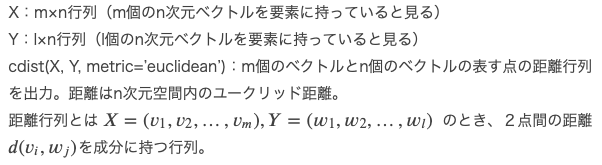

In [4]:
w = 100  # 窓幅
nk = 1  # 近傍点

Xtr = data[:3000, 2]  # 学習
X = data[3000:6000, 2]  # テスト

In [5]:
Dtr = np.array([Xtr[i : i + w] for i in range(3001 - w)])  # window毎に切り出していく
D = np.array([X[i : i + w] for i in range(3001 - w)])
len(Dtr)

2901

In [6]:
D_dist = cdist(D, Dtr, metric="euclidean")

In [35]:
D_dist[0]

array([17.38101047, 17.11589977, 16.85698965, ..., 17.46850523,
       17.18995782, 16.91236826])

In [19]:
print(np.min(D_dist))
np.min(D_dist, axis=1)

0.1188486432400468


array([0.48018226, 0.48143016, 0.48267484, ..., 0.78616156, 0.78528657,
       0.78609796])

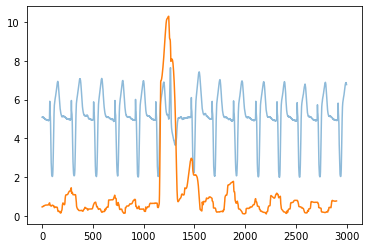

In [23]:
a = np.min(D_dist, axis=1)
b = np.max(D_dist, axis=1)
plt.plot(data[3000:6000, 2], alpha=0.5)
plt.plot(a)
# plt.plot(b)
# np.mean(a)

In [13]:
hoge = np.array([[0, 1], [0, 0], [3, 2]])